# Data Preprocessing

In [49]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split,StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score,auc,classification_report,log_loss,mean_absolute_error,mean_squared_error,r2_score,cohen_kappa_score,mean_absolute_percentage_error,f1_score
import warnings
pd.set_option("display.max_columns",None)
warnings.filterwarnings('ignore') #ignore warning messages 

In [2]:
df = pd.read_csv("E:/College Stuff/Sem 4/data.csv")

In [81]:
df[df["diagnosis"]==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.540,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,0.3141,3.8960,2.041,22.810,0.007594,0.008878,0.00000,0.000000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [4]:
## Dropping this column as it has only NaN values
df = df.drop(['Unnamed: 32','id'],axis=1)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Reassigning the Target variable 

In [6]:
target = {'M':1,'B':0}

In [7]:
df['diagnosis'].replace(to_replace=target,inplace=True)

## Model Building 1

In [8]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
## scaling the data since they are not in the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

In [11]:
# Evaluation criteria

def evaluation_criteria(y_pred,y_test):
    print()
    print("Evaluation Metrics")
    print("Mean Absolute Error:{}".format(round(mean_absolute_error(y_pred,y_test),ndigits=3)))
    print("Root Mean Absolute Error:{}".format(round(math.sqrt(mean_squared_error(y_pred,y_test)),ndigits=3)))
    print("R2 Squared: {}".format(round(r2_score(y_pred,y_test),ndigits=3)))
    print("Cohen Kappa Score: {}".format(round(cohen_kappa_score(y_test,y_pred),ndigits=3)))
    # print("Mean Absolute Percentage Error: {}".format(mean_absolute_percentage_error(y_test,y_pred)))
    

In [12]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics(cm):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [13]:
# ROC curve
def plot_roc(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [14]:
 def model_build(model,y_test=y_test):
    """model -> The model object """  
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    print(round(end - start,ndigits=3), "seconds")
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)

    # Confusion maxtrix & metrics
    cm = confusion_matrix(y_test, y_pred)
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Confusion matrix')
    plt.savefig('6')
    plt.show()

    show_metrics(cm)
    
    evaluation_criteria(y_pred,y_test)

    # ROC curve
    fpr, tpr, t = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr,tpr)
    plot_roc(fpr,tpr,roc_auc)
    
    print(classification_report(y_test,y_pred))

In [15]:
log = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
rf = RandomForestClassifier()
SGD = SGDClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier()
lgbm = lgb.LGBMClassifier()

0.055 seconds


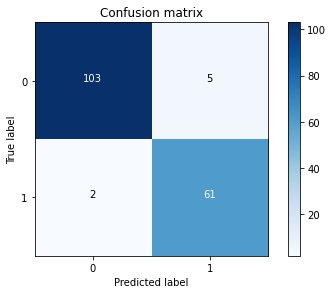

Accuracy  =     0.959
Precision =     0.924
Recall    =     0.968
F1_score  =     0.946

Evaluation Metrics
Mean Absolute Error:0.041
Root Mean Absolute Error:0.202
R2 Squared: 0.827
Cohen Kappa Score: 0.913


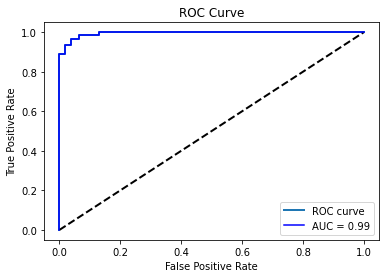

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [16]:
model_build(log)

0.002 seconds


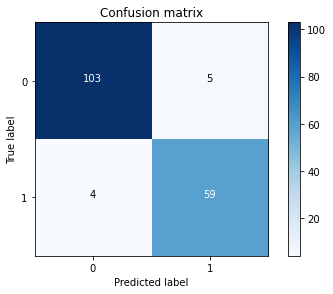

Accuracy  =     0.947
Precision =     0.922
Recall    =     0.937
F1_score  =     0.929

Evaluation Metrics
Mean Absolute Error:0.053
Root Mean Absolute Error:0.229
R2 Squared: 0.775
Cohen Kappa Score: 0.887


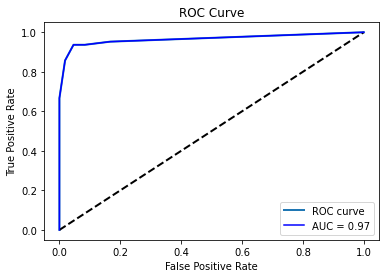

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [17]:
model_build(knn)

0.017 seconds


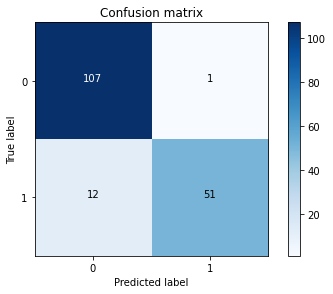

Accuracy  =     0.924
Precision =     0.981
Recall    =     0.810
F1_score  =     0.887

Evaluation Metrics
Mean Absolute Error:0.076
Root Mean Absolute Error:0.276
R2 Squared: 0.641
Cohen Kappa Score: 0.83


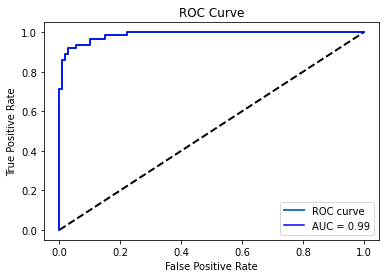

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       108
           1       0.98      0.81      0.89        63

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



In [18]:
model_build(svc)

0.137 seconds


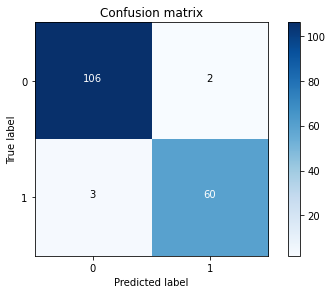

Accuracy  =     0.971
Precision =     0.968
Recall    =     0.952
F1_score  =     0.960

Evaluation Metrics
Mean Absolute Error:0.029
Root Mean Absolute Error:0.171
R2 Squared: 0.873
Cohen Kappa Score: 0.937


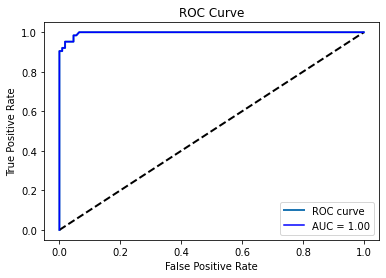

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [19]:
model_build(rf)

0.246 seconds


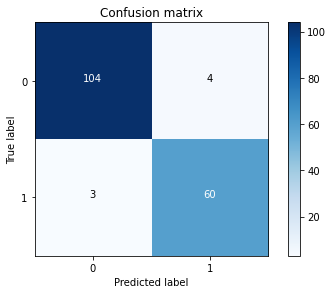

Accuracy  =     0.959
Precision =     0.938
Recall    =     0.952
F1_score  =     0.945

Evaluation Metrics
Mean Absolute Error:0.041
Root Mean Absolute Error:0.202
R2 Squared: 0.825
Cohen Kappa Score: 0.912


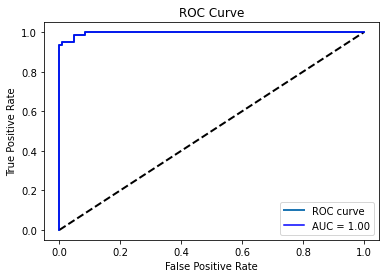

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [20]:
model_build(gb)

[21:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.036 seconds


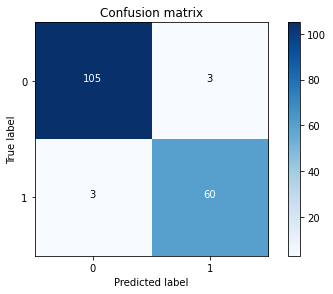

Accuracy  =     0.965
Precision =     0.952
Recall    =     0.952
F1_score  =     0.952

Evaluation Metrics
Mean Absolute Error:0.035
Root Mean Absolute Error:0.187
R2 Squared: 0.849
Cohen Kappa Score: 0.925


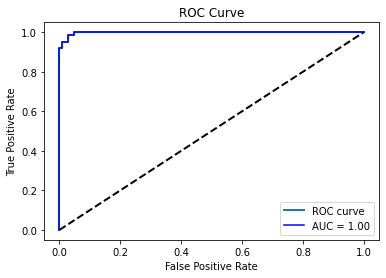

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [21]:
model_build(xgb)

0.007 seconds


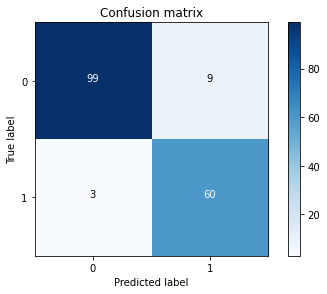

Accuracy  =     0.930
Precision =     0.870
Recall    =     0.952
F1_score  =     0.909

Evaluation Metrics
Mean Absolute Error:0.07
Root Mean Absolute Error:0.265
R2 Squared: 0.708
Cohen Kappa Score: 0.852


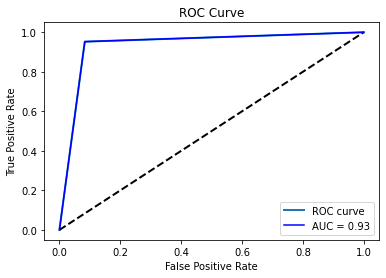

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       108
           1       0.87      0.95      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [22]:
model_build(dt)

0.1 seconds


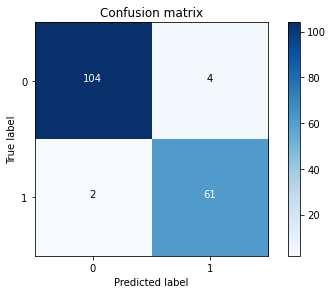

Accuracy  =     0.965
Precision =     0.938
Recall    =     0.968
F1_score  =     0.953

Evaluation Metrics
Mean Absolute Error:0.035
Root Mean Absolute Error:0.187
R2 Squared: 0.851
Cohen Kappa Score: 0.925


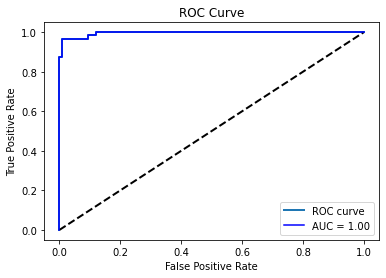

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [23]:
model_build(ada)

0.147 seconds


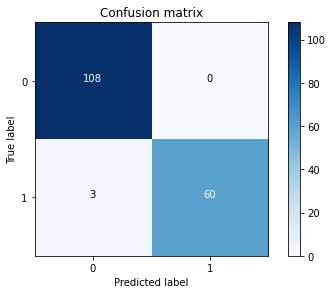

Accuracy  =     0.982
Precision =     1.000
Recall    =     0.952
F1_score  =     0.976

Evaluation Metrics
Mean Absolute Error:0.018
Root Mean Absolute Error:0.132
R2 Squared: 0.923
Cohen Kappa Score: 0.962


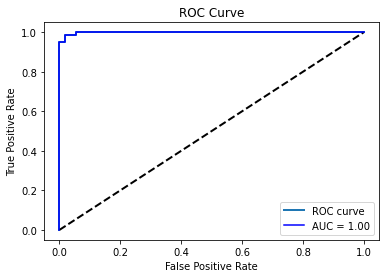

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [24]:
model_build(lgbm)

## Dealing with multicolinearity

In [ ]:
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df1 = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df1.shape[1]} columns.")

## Dealing with outliers

In [ ]:
## treating outliers by capping the values
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()

        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)

        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

In [ ]:
df1 = mod_outlier(df1)

In [ ]:
df1.describe()

In [ ]:
var1 = df1.columns

In [ ]:
def box_plot(a,df):
    sns.boxplot(x=a,
    data=df
    )
    plt.tight_layout()
    plt.show()

In [ ]:
for i in var1:
    box_plot(i,df1)

## Model Building 2

In [ ]:
df1.head()

In [ ]:
df1.describe()

In [ ]:
# creating features and label 

X = df1.drop('diagnosis', axis = 1)
y = df1['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
## scaling the data since they are not in the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log1 = LogisticRegression()
knn1 = KNeighborsClassifier()
svc1 = SVC(probability=True)
rf1= RandomForestClassifier()
gb1 = GradientBoostingClassifier()
xgb1 = XGBClassifier(verbosity = 0)
dt1 = DecisionTreeClassifier()
ada1 = AdaBoostClassifier()
lgbm1 = lgb.LGBMClassifier()

In [ ]:
mod = [log1,knn1,svc1,rf1,gb1,xgb1,dt1,ada1,lgbm1]

In [ ]:
for i in mod:
    print(i)
    model_build(i)

## Using Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def cross_val_model(a):
    scores = cross_val_score(a, X, y, cv=5)
    print("Scores:{}".format(scores))
    print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
for i in mod:
    print(i)
    cross_val_model(i)
    print()

## Hyperparameter Tuning

## Logistic Regression

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train,y_train)

In [ ]:
best_clf.best_estimator_

In [ ]:
best_clf.best_score_

In [ ]:
log2 = LogisticRegression(C=1.623776739188721, penalty='l1', solver='saga')

In [ ]:
scores = cross_val_score(log1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(log2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(log1)

print("")

model_build(log2)

In [ ]:
from sklearn import metrics

In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(40)
for i in range(1,41):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

In [ ]:
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,41), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

Most accuracy is at n=17. 

In [ ]:
grid_params = { 'n_neighbors' : [17],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)

In [ ]:
g_res.best_estimator_

In [ ]:
g_res.best_score_

In [ ]:
knn2 = KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')

In [ ]:
scores = cross_val_score(knn1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(knn2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(knn1)

print("")

model_build(knn2)

## Support Vector Classifier

In [ ]:
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

In [ ]:
grid_search = GridSearchCV(SVC(), parameters,verbose = 1,cv=10,n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
svc2 = SVC(C=10, gamma=0.01,probability=True)

In [ ]:
scores = cross_val_score(svc1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(svc2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(svc1)

print("")

model_build(svc2)

## Random Forest

In [ ]:
rf2 = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto',
                                  min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rf2.fit(X_train, y_train)

In [ ]:
y_pred = rf2.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, rf2.predict(X_train)))

rf_acc = accuracy_score(y_test, y_pred)
print(rf)

In [ ]:
scores = cross_val_score(rf1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(rf2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(rf1)

print("")

model_build(rf2)

## Gradient Boosting Classifier

In [ ]:
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

In [ ]:
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

In [ ]:
grid_search_gbc.best_estimator_

In [ ]:
grid_search_gbc.best_score_

In [ ]:
gb2 = GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [ ]:
scores = cross_val_score(gb1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(gb2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(gb1)

print("")

model_build(gb2)

## XGBoost

In [ ]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [ ]:
gs2 = GridSearchCV(XGBClassifier(), parameters, cv = 10, n_jobs = -1, verbose = 1)
gs2.fit(X_train, y_train)

In [ ]:
gs2.best_score_

In [ ]:
gs2.best_estimator_

In [ ]:
xgb2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, loss='deviance', max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
scores = cross_val_score(xgb1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(xgb2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(xgb1)

print("")

model_build(xgb2)

## Decision Tree

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

In [ ]:
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

In [ ]:
grid_search_dt.best_score_

In [ ]:
grid_search_dt.best_estimator_

In [ ]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_split=3,
                       splitter='random')

In [ ]:
scores = cross_val_score(dt1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(dt2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(dt1)

print("")

model_build(dt2)

## Ada Boost Classifier

In [ ]:
parameter = {
    'n_estimators' : [100,200],
    'learning_rate' : [0.001,0.01,0.1,0.2,0.5] 
}

In [ ]:
gs_ad = GridSearchCV(AdaBoostClassifier(),param_grid=parameter,cv=10,n_jobs=-1)
gs_ad.fit(X_train,y_train)

In [ ]:
gs_ad.best_score_

In [ ]:
gs_ad.best_estimator_

In [ ]:
ada2 = AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [ ]:
scores = cross_val_score(ada1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(ada2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(ada1)

print("")

model_build(ada2)

## LightGBM Classifier

In [ ]:
param_grid={'learning_rate': np.logspace(-3, -1, 3),
            'max_depth':  np.linspace(5,12,8,dtype = int),
            'n_estimators': np.linspace(800,1200,5, dtype = int),
            }

gs_lgbm=GridSearchCV(lgb.LGBMClassifier(),param_grid=param_grid, n_jobs=-1, cv=10, verbose=False)

In [ ]:
gs_lgbm.fit(X_train,y_train)

In [ ]:
gs_lgbm.best_score_

In [ ]:
gs_lgbm.best_estimator_

In [ ]:
lgbm2 = lgb.LGBMClassifier(max_depth=8, n_estimators=800)

In [ ]:
scores = cross_val_score(lgbm1, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

print("")

scores = cross_val_score(lgbm2, X, y, cv=10)
print("Scores:{}".format(scores))
print("Mean Cross Validation score is: {}".format(scores.mean()))

In [ ]:
model_build(lgbm1)

print("")

model_build(lgbm2)

## Using Stratified K fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
X1 = np.asanyarray(X)
y1 = np.asanyarray(y)

In [ ]:
def StratifiedModelScores(model):
    acc_model=[]
    prec_model=[]
    recall_model=[]
    f1_model=[]
    mae_model=[]
    rmse_model=[]
    r2_model=[]
    kappa_model=[]

    skf=StratifiedKFold(n_splits=10)
    for train_index, test_index in skf.split(X, y):     
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y1[train_index], y1[test_index]

        # clf=GradientBoostingClassifier(learning_rate=1, loss='exponential',
                               #n_estimators=200)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        # print(f"The fold is : {fold} : ")
        print(classification_report(y_test,y_pred))
        acc=round(accuracy_score(y_test,y_pred),ndigits=3)
        prec = round(precision_score(y_test,y_pred),ndigits=3)
        recall = round(recall_score(y_test,y_pred),ndigits=3)
        f1 = round(f1_score(y_test,y_pred),ndigits=3)
        mae = round(mean_absolute_error(y_pred,y_test),ndigits=3)
        rmse = round(math.sqrt(mean_squared_error(y_pred,y_test)),ndigits=3)
        r2 = round(r2_score(y_pred,y_test),ndigits=3)
        kappa = round(cohen_kappa_score(y_test,y_pred),ndigits=3)
        acc_model.append(acc)
        prec_model.append(prec)
        recall_model.append(recall)
        f1_model.append(f1)
        mae_model.append(mae)
        rmse_model.append(rmse)
        r2_model.append(r2)
        kappa_model.append(kappa)
        # print(f"The accuracy for {fold+1} : {acc}")
        pass

    print("Mean Accuracy: {}".format(round(np.mean(acc_model),ndigits=3)))
    print("Mean Precision: {}".format(round(np.mean(prec_model),ndigits=3)))
    print("Mean Recall: {}".format(round(np.mean(recall_model),ndigits=3)))
    print("Mean F1 Score: {}".format(round(np.mean(f1_model),ndigits=3)))
    print("Mean Absolute Error: {}".format(round(np.mean(mae_model),ndigits=3)))
    print("Root Mean Squared Error: {}".format(round(np.mean(rmse_model),ndigits=3)))
    print("Mean R2 Value: {}".format(round(np.mean(r2_model),ndigits=3)))
    print("Mean Cohen Kappa Score: {}".format(round(np.mean(kappa_model),ndigits=3)))

In [ ]:
model1 = LogisticRegression(C=1.623776739188721, penalty='l1', solver='saga')

In [ ]:
StratifiedModelScores(model1)

In [ ]:
model2 = KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')

In [ ]:
StratifiedModelScores(model2)

In [ ]:
model3 = SVC(C=10, gamma=0.01,probability=True)
StratifiedModelScores(model3)

In [ ]:
model4 = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto',
                                  min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
StratifiedModelScores(model4)

In [ ]:
model5 = GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)
StratifiedModelScores(model5)

In [ ]:
model6 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, loss='deviance', max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
StratifiedModelScores(model6)

In [ ]:
model7 = AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
StratifiedModelScores(model7)

In [ ]:
model8 = lgb.LGBMClassifier(max_depth=8, n_estimators=800)
StratifiedModelScores(model8)

## Feature Selection

In [93]:
from sklearn.feature_selection import SelectFromModel
#from lightgbm import LGBMClassifier

lgbc=lgb.LGBMClassifier()

embeded_lgb_selector = SelectFromModel(lgbc, max_features=7)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

7 selected features


In [94]:
embeded_lgb_feature

['texture_mean',
 'concave points_mean',
 'area_se',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [95]:
X_new = X[embeded_lgb_feature]

In [96]:
X_new.describe()

,texture_mean,concave points_mean,area_se,texture_worst,perimeter_worst,area_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.289649,0.048919,40.337079,25.677223,107.261213,880.583128,0.114606
std,4.301036,0.038803,45.491006,6.146258,33.602542,569.356993,0.065732
min,9.710000,0.000000,6.802000,12.020000,50.410000,185.200000,0.000000
25%,16.170000,0.020310,17.850000,21.080000,84.110000,515.300000,0.064930
50%,18.840000,0.033500,24.530000,25.410000,97.660000,686.500000,0.099930
75%,21.800000,0.074000,45.190000,29.720000,125.400000,1084.000000,0.161400
max,39.280000,0.201200,542.200000,49.540000,251.200000,4254.000000,0.291000


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.30, random_state = 0)

In [98]:
lgbm_test = lgb.LGBMClassifier(max_depth=8, n_estimators=800)

0.176 seconds


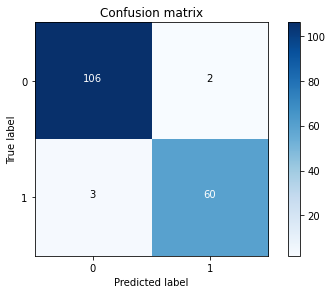

Accuracy  =     0.971
Precision =     0.968
Recall    =     0.952
F1_score  =     0.960

Evaluation Metrics
Mean Absolute Error:0.029
Root Mean Absolute Error:0.171
R2 Squared: 0.873
Cohen Kappa Score: 0.937


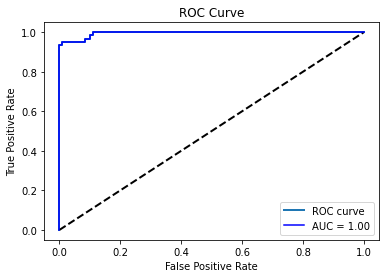

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [99]:
model_build(lgbm_test)

In [100]:
X_new.corr()

,texture_mean,concave points_mean,area_se,texture_worst,perimeter_worst,area_worst,concave points_worst
texture_mean,1.000000,0.293464,0.259845,0.912045,0.358040,0.343546,0.295316
concave points_mean,0.293464,1.000000,0.690299,0.292752,0.855923,0.809630,0.910155
area_se,0.259845,0.690299,1.000000,0.196497,0.761213,0.811408,0.538166
texture_worst,0.912045,0.292752,0.196497,1.000000,0.365098,0.345842,0.359755
perimeter_worst,0.358040,0.855923,0.761213,0.365098,1.000000,0.977578,0.816322
area_worst,0.343546,0.809630,0.811408,0.345842,0.977578,1.000000,0.747419
concave points_worst,0.295316,0.910155,0.538166,0.359755,0.816322,0.747419,1.000000


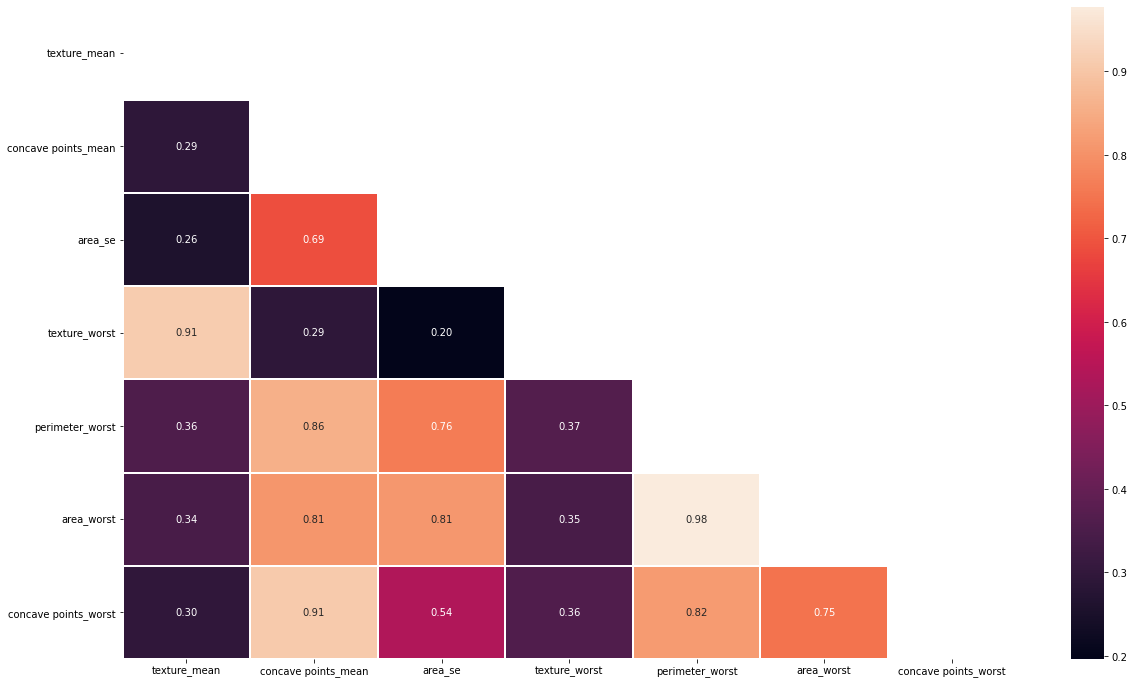

In [101]:
plt.figure(figsize = (20, 12))

corr = X_new.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

## Saving model

In [79]:
import pickle

In [80]:
pickle.dump(lgbm_test,open('cancer.pkl','wb'))